In [1]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

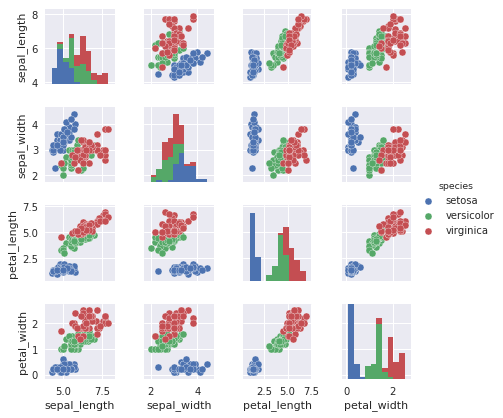

In [2]:
%matplotlib inline
import seaborn as sns; sns.set()
sns.pairplot(iris, hue='species', size=1.5);

In [3]:
X_iris = iris.drop('species', axis=1)
X_iris.shape

(150, 4)

In [4]:
y_iris = iris['species']
y_iris.shape

(150,)

In [6]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris,
random_state=1)

In [7]:
from sklearn.naive_bayes import GaussianNB # 1. choose model class
model = GaussianNB() # 2. instantiate model
model.fit(Xtrain, ytrain) # 3. fit model to data
y_model = model.predict(Xtest) # 4. predict on new data

In [8]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.9736842105263158

Unsupervised learning example: Iris dimensionality

let’s take a look at reducing the
dimensionality of the Iris data so as to more easily visualize it. Recall that the Iris data
is four dimensional: there are four features recorded for each sample.

The task of dimensionality reduction is to ask whether there is a suitable lowerdimensional
representation that retains the essential features of the data. Often
dimensionality reduction is used as an aid to visualizing data; after all, it is much easier
to plot data in two dimensions than in four dimensions or higher!

In [9]:
from sklearn.decomposition import PCA # 1. Choose the model class
model = PCA(n_components=2) # 2. Instantiate the model with hyperparameters
model.fit(X_iris) # 3. Fit to data. Notice y is not specified!
X_2D = model.transform(X_iris) # 4. Transform the data to two dimension

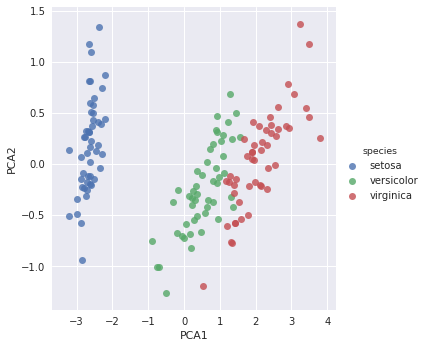

In [10]:
iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]
sns.lmplot("PCA1", "PCA2", hue='species', data=iris, fit_reg=False);

Unsupervised learning: Iris clustering

In [12]:
from sklearn.mixture import GaussianMixture # 1. Choose the model class
model = GaussianMixture(n_components=3,
covariance_type='full') # 2. Instantiate the model w/ hyperparameters
model.fit(X_iris) # 3. Fit to data. Notice y is not specified!
y_gmm = model.predict(X_iris) # 4. Determine cluster labels

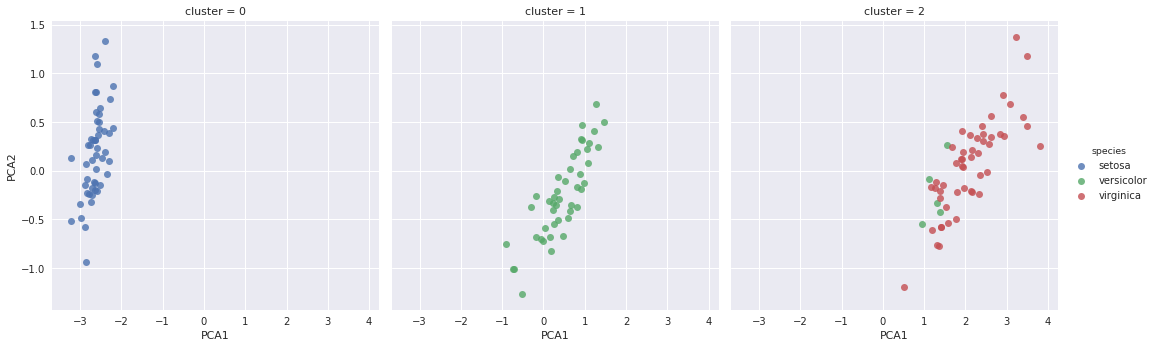

In [13]:
iris['cluster'] = y_gmm
sns.lmplot("PCA1", "PCA2", data=iris, hue='species',
col='cluster', fit_reg=False);

Exploring Handwritten Digits



In [14]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

(1797, 8, 8)

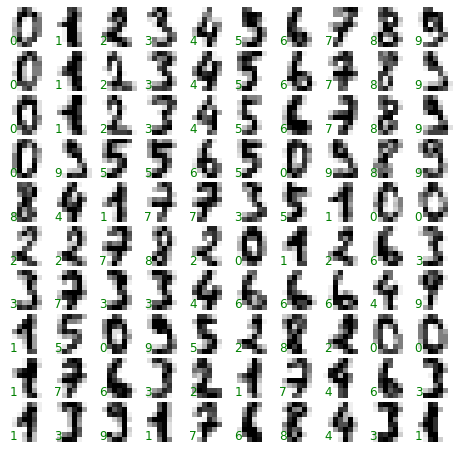

In [16]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                        subplot_kw={'xticks':[], 'yticks':[]},
                        gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
        transform=ax.transAxes, color='green')

In [17]:
X = digits.data
X.shape

(1797, 64)

In [18]:
y = digits.target
y.shape

(1797,)

Unsupervised learning: Dimensionality reduction

In [19]:
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)
data_projected.shape

(1797, 2)

In [22]:
plt.scatter(data_projected[:, 0], data_projected[:, 1], c=digits.target,
            edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('spectral', 10))
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5);

ValueError: Colormap spectral is not recognized. Possible values are: Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, twilight, twilight_r, twilight_shifted, twilight_shifted_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r

In [23]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)

In [24]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

In [25]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.8333333333333334

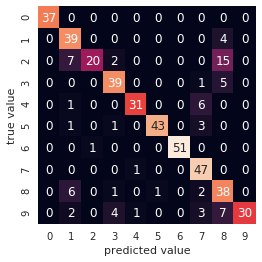

In [26]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, y_model)
sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

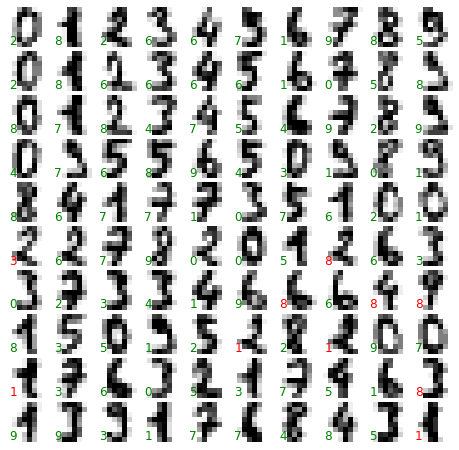

In [28]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                        subplot_kw={'xticks':[], 'yticks':[]},
                        gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(y_model[i]),
            transform=ax.transAxes,
            color='green' if (ytest[i] == y_model[i]) else 'red')

Hyperparameters and Model Validation

    Model validation the wrong way
    
    

In [29]:
from sklearn.datasets import load_iris
iris = load_iris()

In [30]:
X = iris.data
y = iris.target

In [31]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=1)

In [32]:
model.fit(X, y)
y_model = model.predict(X)

In [33]:
from sklearn.metrics import accuracy_score
accuracy_score(y, y_model)

1.0

Model validation the right way: Holdout sets


In [34]:
from sklearn.model_selection import train_test_split
# split the data with 50% in each set
X1, X2, y1, y2 = train_test_split(X, y, random_state=0,
train_size=0.5)

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [35]:
model.fit(X1, y1)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [36]:
y2_model = model.predict(X2)
accuracy_score(y2, y2_model)

0.9066666666666666

In [37]:
y2_model = model.fit(X1, y1).predict(X2)
y1_model = model.fit(X2, y2).predict(X1)
accuracy_score(y1, y1_model), accuracy_score(y2, y2_model)

(0.96, 0.9066666666666666)

In [38]:
from sklearn.model_selection import cross_val_score
cross_val_score(model, X, y, cv=5)


array([0.96666667, 0.96666667, 0.93333333, 0.93333333, 1.        ])

In [39]:
from sklearn.cross_validation import LeaveOneOut
scores = cross_val_score(model, X, y, cv=LeaveOneOut(len(X)))
scores

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [40]:
scores.mean()

0.96

Selecting the Best Model

In [42]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                        LinearRegression(**kwargs))

In [43]:
import numpy as np
def make_data(N, err=1.0, rseed=1):
# randomly sample the data
    rng = np.random.RandomState(rseed)
    X = rng.rand(N, 1) ** 2
    y = 10 - 1. / (X.ravel() + 0.1)
    if err > 0:
        y += err * rng.randn(N)
    return X, y
X, y = make_data(40)

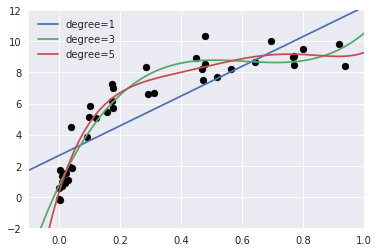

In [44]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set() # plot formatting
X_test = np.linspace(-0.1, 1.1, 500)[:, None]
plt.scatter(X.ravel(), y, color='black')
axis = plt.axis()
for degree in [1, 3, 5]:
    y_test = PolynomialRegression(degree).fit(X, y).predict(X_test)
    plt.plot(X_test.ravel(), y_test, label='degree={0}'.format(degree))
plt.xlim(-0.1, 1.0)
plt.ylim(-2, 12)
plt.legend(loc='best');

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


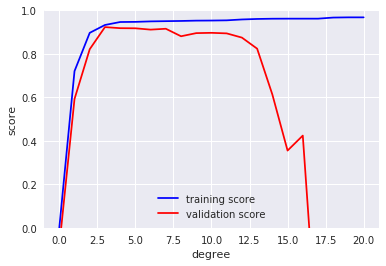

In [45]:
from sklearn.learning_curve import validation_curve
degree = np.arange(0, 21)
train_score, val_score = validation_curve(PolynomialRegression(), X, y,
                                            'polynomialfeatures__degree',
                                            degree, cv=7)
plt.plot(degree, np.median(train_score, 1), color='blue', label='training score')
plt.plot(degree, np.median(val_score, 1), color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score');

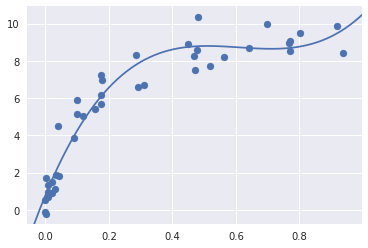

In [46]:
plt.scatter(X.ravel(), y)
lim = plt.axis()
y_test = PolynomialRegression(3).fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test);
plt.axis(lim);

Learning Curves

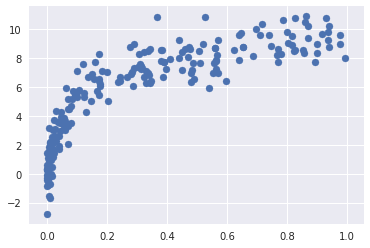

In [47]:
X2, y2 = make_data(200)
plt.scatter(X2.ravel(), y2);

(0, 1)

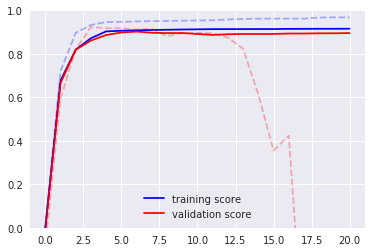

In [48]:
degree = np.arange(21)
train_score2, val_score2 = validation_curve(PolynomialRegression(), X2, y2,
                                            'polynomialfeatures__degree',
                                            degree, cv=7)
plt.plot(degree, np.median(train_score2, 1), color='blue',
label='training score')
plt.plot(degree, np.median(val_score2, 1), color='red', label='validation score')
plt.plot(degree, np.median(train_score, 1), color='blue', alpha=0.3,
linestyle='dashed')
plt.plot(degree, np.median(val_score, 1), color='red', alpha=0.3,
linestyle='dashed')
plt.legend(loc='lower center')
plt.ylim(0, 1)

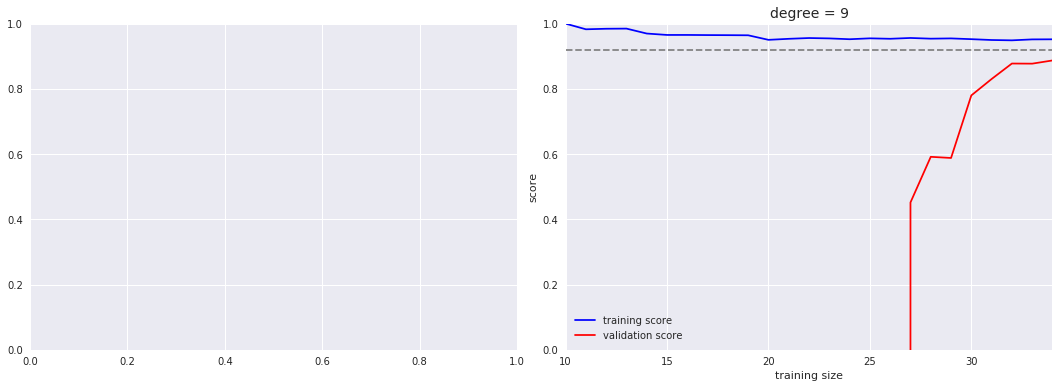

In [51]:
from sklearn.learning_curve import learning_curve
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for i, degree in enumerate([2, 9]):
    N, train_lc, val_lc = learning_curve(PolynomialRegression(degree),
                                        X, y, cv=7,
                                        train_sizes=np.linspace(0.3, 1, 25))
ax[i].plot(N, np.mean(train_lc, 1), color='blue', label='training score')
ax[i].plot(N, np.mean(val_lc, 1), color='red', label='validation score')
ax[i].hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0], N[-1], color='gray',
linestyle='dashed')
ax[i].set_ylim(0, 1)
ax[i].set_xlim(N[0], N[-1])
ax[i].set_xlabel('training size')
ax[i].set_ylabel('score')
ax[i].set_title('degree = {0}'.format(degree), size=14)
ax[i].legend(loc='best')

Validation in Practice: Grid Search

In [52]:
from sklearn.grid_search import GridSearchCV
param_grid = {'polynomialfeatures__degree': np.arange(21),
'linearregression__fit_intercept': [True, False],
'linearregression__normalize': [True, False]}
grid = GridSearchCV(PolynomialRegression(), param_grid, cv=7)

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [53]:
grid.fit(X, y);



In [54]:
grid.best_params_

{'linearregression__fit_intercept': False,
 'linearregression__normalize': True,
 'polynomialfeatures__degree': 4}

AttributeError: Unknown property hold

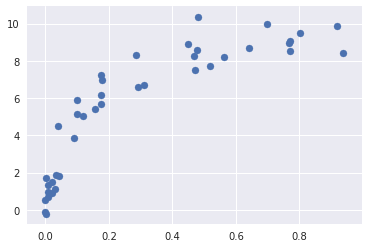

In [55]:
model = grid.best_estimator_
plt.scatter(X.ravel(), y)
lim = plt.axis()
y_test = model.fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test, hold=True);
plt.axis(lim);

Feature Engineering



In [56]:
data = [
{'price': 850000, 'rooms': 4, 'neighborhood': 'Queen Anne'},
{'price': 700000, 'rooms': 3, 'neighborhood': 'Fremont'},
{'price': 650000, 'rooms': 3, 'neighborhood': 'Wallingford'},
{'price': 600000, 'rooms': 2, 'neighborhood': 'Fremont'}
]

In [57]:
from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer(sparse=False, dtype=int)
vec.fit_transform(data)

array([[     0,      1,      0, 850000,      4],
       [     1,      0,      0, 700000,      3],
       [     0,      0,      1, 650000,      3],
       [     1,      0,      0, 600000,      2]], dtype=int64)

In [58]:
vec.get_feature_names()

['neighborhood=Fremont',
 'neighborhood=Queen Anne',
 'neighborhood=Wallingford',
 'price',
 'rooms']

In [59]:
vec = DictVectorizer(sparse=True, dtype=int)
vec.fit_transform(data)

<4x5 sparse matrix of type '<class 'numpy.int64'>'
	with 12 stored elements in Compressed Sparse Row format>

Text Features

In [61]:
sample = ['problem of evil',
'evil queen',
'horizon problem']

In [62]:
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer()
X = vec.fit_transform(sample)
X

<3x5 sparse matrix of type '<class 'numpy.int64'>'
	with 7 stored elements in Compressed Sparse Row format>

In [63]:
import pandas as pd
pd.DataFrame(X.toarray(), columns=vec.get_feature_names())

evil  horizon  of  problem  queen
0     1        0   1        1      0
1     1        0   0        0      1
2     0        1   0        1      0

In [64]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer()
X = vec.fit_transform(sample)
pd.DataFrame(X.toarray(), columns=vec.get_feature_names())

evil   horizon        of   problem     queen
0  0.517856  0.000000  0.680919  0.517856  0.000000
1  0.605349  0.000000  0.000000  0.000000  0.795961
2  0.000000  0.795961  0.000000  0.605349  0.000000

Derived Features

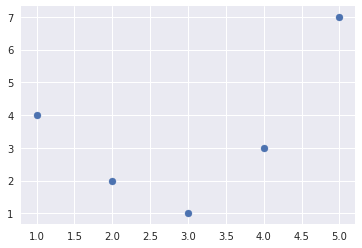

In [65]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
x = np.array([1, 2, 3, 4, 5])
y = np.array([4, 2, 1, 3, 7])
plt.scatter(x, y);

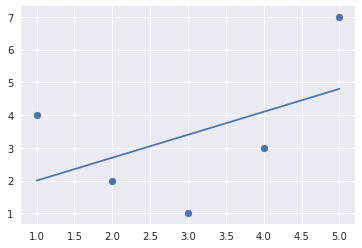

In [66]:
from sklearn.linear_model import LinearRegression
X = x[:, np.newaxis]
model = LinearRegression().fit(X, y)
yfit = model.predict(X)
plt.scatter(x, y)
plt.plot(x, yfit);

In [67]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3, include_bias=False)
X2 = poly.fit_transform(X)
print(X2)

[[  1.   1.   1.]
 [  2.   4.   8.]
 [  3.   9.  27.]
 [  4.  16.  64.]
 [  5.  25. 125.]]


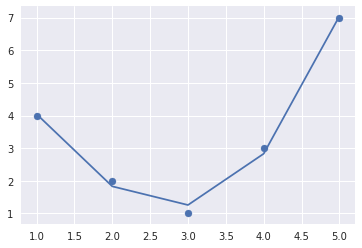

In [68]:
model = LinearRegression().fit(X2, y)
yfit = model.predict(X2)
plt.scatter(x, y)
plt.plot(x, yfit);

Imputation of Missing Data

In [69]:
from numpy import nan
X = np.array([[ nan, 0, 3 ],
[ 3, 7, 9 ],
[ 3, 5, 2 ],
[ 4, nan, 6 ],
[ 8, 8, 1 ]])
y = np.array([14, 16, -1, 8, -5])

In [70]:
from sklearn.preprocessing import Imputer
imp = Imputer(strategy='mean')
X2 = imp.fit_transform(X)
X2

array([[4.5, 0. , 3. ],
       [3. , 7. , 9. ],
       [3. , 5. , 2. ],
       [4. , 5. , 6. ],
       [8. , 8. , 1. ]])

In [71]:
model = LinearRegression().fit(X2, y)
model.predict(X2)

array([13.14869292, 14.3784627 , -1.15539732, 10.96606197, -5.33782027])

Feature Pipelines

In [72]:
from sklearn.pipeline import make_pipeline
model = make_pipeline(Imputer(strategy='mean'),
PolynomialFeatures(degree=2),
LinearRegression())

In [73]:
model.fit(X, y) # X with missing values, from above
print(y)
print(model.predict(X))

[14 16 -1  8 -5]
[14. 16. -1.  8. -5.]


A Face Detection Pipeline


Histogram of Oriented Gradients (HOG) Technique  ---which transforms image pixels into a vector representation
that is sensitive to broadly informative image features regardless of
confounding factors like illumination.



In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

HOG Features

1 Optionally prenormalize images. This leads to features that resist dependence on variations in illumination.

2 Convolve the image with two filters that are sensitive to horizontal and vertical brightness gradients. These capture edge, contour, and texture information.

3 Subdivide the image into cells of a predetermined size, and compute a histogram of the gradient orientations within each cell.


4 Normalize the histograms in each cell by comparing to the block of neighboring cells. This further suppresses the effect of illumination across the image.

5 Construct a one-dimensional feature vector from the information in each cell.



/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


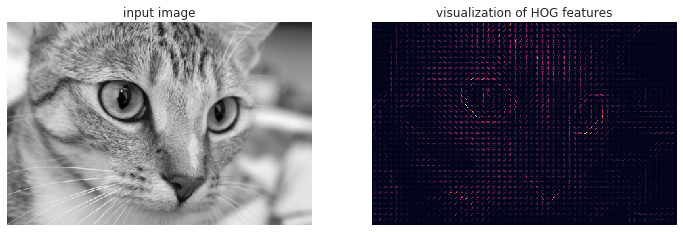

In [3]:
from skimage import data, color, feature
import skimage.data
image = color.rgb2gray(data.chelsea())
hog_vec, hog_vis = feature.hog(image, visualise=True)
fig, ax = plt.subplots(1, 2, figsize=(12, 6),
subplot_kw=dict(xticks=[], yticks=[]))
ax[0].imshow(image, cmap='gray')
ax[0].set_title('input image')
ax[1].imshow(hog_vis)
ax[1].set_title('visualization of HOG features');

HOG in Action: A Simple Face Detector

The steps are as follows:


1. Obtain a set of image thumbnails of faces to constitute “positive” training samples.
2. Obtain a set of image thumbnails of nonfaces to constitute “negative” training samples.
3. Extract HOG features from these training samples.

4. Train a linear SVM classifier on these samples.

5. For an “unknown” image, pass a sliding window across the image, using the model to evaluate whether that window contains a face or not.

6. If detections overlap, combine them into a single window.

In [4]:
# Obtain a set of positive training samples.

from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people()
positive_patches = faces.images
positive_patches.shape

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will

(13233, 62, 47)

In [5]:
positive_patches.shape

(13233, 62, 47)

Obtain a set of negative training samples.

set of similarly sized thumbnails that do not have a face in them.
One way to do this is to take any corpus of input images, and extract thumbnails
from them at a variety of scales

In [7]:
from skimage import data, transform
imgs_to_use = ['camera', 'text', 'coins', 'moon',
'page', 'clock', 'immunohistochemistry',
'chelsea', 'coffee', 'hubble_deep_field']
images = [color.rgb2gray(getattr(data, name)())
for name in imgs_to_use]

In [10]:
from sklearn.feature_extraction.image import PatchExtractor
def extract_patches(img, N, scale=1.0,
                    patch_size=positive_patches[0].shape):
    extracted_patch_size = \
    tuple((scale * np.array(patch_size)).astype(int))
    extractor = PatchExtractor(patch_size=extracted_patch_size,
                                max_patches=N, random_state=0)
    patches = extractor.transform(img[np.newaxis])
    if scale != 1:
        patches = np.array([transform.resize(patch, patch_size)
                            for patch in patches])
    return patches

In [11]:
negative_patches = np.vstack([extract_patches(im, 1000, scale)
                            for im in images for scale in [0.5, 1.0, 2.0]])
negative_patches.shape

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/feature_extraction/image.py:287: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  indexing_strides = arr[slices].strides
/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


(30000, 62, 47)

In [12]:
negative_patches.shape

(30000, 62, 47)

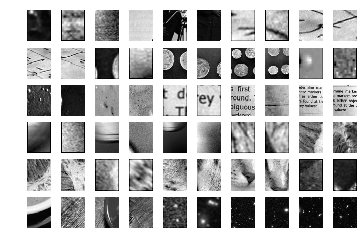

In [13]:
# take a look at a few of them

fig, ax = plt.subplots(6, 10)
for i, axi in enumerate(ax.flat):
    axi.imshow(negative_patches[500 * i], cmap='gray')
    axi.axis('off')

In [14]:
# Combine sets and extract HOG features.

from itertools import chain
X_train = np.array([feature.hog(im)
                    for im in chain(positive_patches,
                                    negative_patches)])
y_train = np.zeros(X_train.shape[0])
y_train[:positive_patches.shape[0]] = 1

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


In [15]:
X_train.shape


(43233, 1215)

In [17]:
# Train a support vector machine
# let’s use a simple Gaussian naive Bayes to get a quick baseline:

from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
cross_val_score(GaussianNB(), X_train, y_train)



array([0.94677677, 0.91423218, 0.94073971])

In [18]:
# simple naive Bayes algorithm gets usupward of 90% accuracy


support vector machine, with a grid search over a few choices of the C parameter:

In [19]:
from sklearn.svm import LinearSVC
from sklearn.grid_search import GridSearchCV
grid = GridSearchCV(LinearSVC(), {'C': [1.0, 2.0, 4.0, 8.0]})
grid.fit(X_train, y_train)
grid.best_score_

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


0.9863530173709898

In [20]:
grid.best_params_

{'C': 2.0}

In [21]:
model = grid.best_estimator_
model.fit(X_train, y_train)

LinearSVC(C=2.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

Find faces in a new image.

grab a new image and see how the model does and run a sliding window over it and evaluate each patch

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


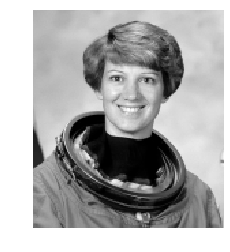

In [25]:
test_image = skimage.data.astronaut()
test_image = skimage.color.rgb2gray(test_image)
test_image = skimage.transform.rescale(test_image, 0.5)
test_image = test_image[:160, 40:180]
plt.imshow(test_image, cmap='gray')
plt.axis('off');


create a window that iterates over patches of this image, and compute
HOG features for each patch:

In [27]:
def sliding_window(img, patch_size=positive_patches[0].shape,
                istep=2, jstep=2, scale=1.0):
    Ni, Nj = (int(scale * s) for s in patch_size)
    for i in range(0, img.shape[0] - Ni, istep):
        for j in range(0, img.shape[1] - Ni, jstep):
            patch = img[i:i + Ni, j:j + Nj]
            if scale != 1:
                patch = transform.resize(patch, patch_size)
            yield (i, j), patch
indices, patches = zip(*sliding_window(test_image))
patches_hog = np.array([feature.hog(patch) for patch in patches])
patches_hog.shape

/Users/sanjotraibagkar/anaconda/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


(1911, 1215)

take these HOG-featured patches and use our model to evaluate whether each patch contains a face:

In [28]:
labels = model.predict(patches_hog)
labels.sum()

31.0

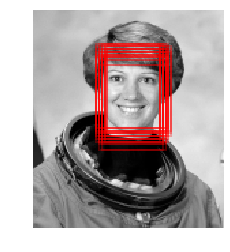

In [31]:
# Windows that were determined to contain a face
#All of the detected patches overlap and found the face in the imag
fig, ax = plt.subplots()
ax.imshow(test_image, cmap='gray')
ax.axis('off')
Ni, Nj = positive_patches[0].shape
indices = np.array(indices)
for i, j in indices[labels == 1]:
    ax.add_patch(plt.Rectangle((j, i), Nj, Ni, edgecolor='red',
                                alpha=0.3, lw=2,
                                facecolor='none'))